In [72]:
####fake review detection#####
###definition: sentiment != rating, 1,2-4,5;4,5-1,2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
raw_data=pd.read_csv("dataAProcess.csv")

,Unnamed: 0,category,rating,name,app,tp,review,date,brand,ratingNum,lenReview,dateindex,Nbrand,sentiment,neg,neu,pos
0,0,Action,Rated 5 stars out of five stars,Kalito Doughnuts,Color Switch,Top Free in Android Apps,This is the type of game you can just pickup a...,"2,9,2017",Fortafy Games,5,346,666,0,0.7345,0.022,0,0.109
1,1,Communication,Rated 5 stars out of five stars,Jonathan Macabuhay,Messenger,Top Free in Android Apps,Very nice to meet you at work and I have to go...,"2,11,2017",Facebook,5,59,668,0,0.4754,0.000,0,0.192
2,2,Finance,Rated 5 stars out of five stars,Lisa Resendez,IRS2Go,Top Free in Android Apps,To the ones saying this app keeps giving a mes...,"1,24,2017",IRS,5,347,650,3,0.6697,0.078,0,0.154
3,3,Communication,Rated 5 stars out of five stars,3rd Degree Inc,Marco Polo Video Walkie Talkie,Top Free in Android Apps,But it constantly crashes! I have reinstalled...,"2,7,2017",Joya Communications,5,302,664,0,0.8685,0.084,0,0.230
4,4,SportsAction & Adventure,Rated 2 stars out of five stars,Morgan Wilson,Madden NFL Mobile,Top Free in Android Apps,I don't like being overwhelmed by all these he...,"1,20,2017",ELECTRONIC ARTS,2,422,646,5,-0.4475,0.139,0,0.082
5,5,Action,Rated 5 stars out of five stars,Arrun Gaydhani,Color Switch,Top Free in Android Apps,Perfect example of what a mobile game should b...,"2,10,2017",Fortafy Games,5,388,667,0,0.8588,0.000,0,0.135
6,6,Action,Rated 4 stars out of five stars,Fatima Damir,Color Switch,Top Free in Android Apps,It's good but the ads are annoying. I like how...,"2,10,2017",Fortafy Games,4,197,667,0,-0.5859,0.236,0,0.201
7,7,Action,Rated 5 stars out of five stars,Versha Verma,Color Switch,Top Free in Android Apps,Its a commentable game. It is not too gud as t...,"2,10,2017",Fortafy Games,5,398,667,0,0.8360,0.000,0,0.127
8,8,Action,Rated 4 stars out of five stars,Trisha Gupta,Color Switch,Top Free in Android Apps,It is a excellent game. But why is Google givi...,"2,11,2017",Fortafy Games,4,143,668,0,-0.3182,0.243,0,0.177
9,9,Action,Rated 5 stars out of five stars,anonymous,Color Switch,Top Free in Android Apps,This game is so much fun to play in. You get t...,"2,9,2017",Fortafy Games,5,287,666,0,0.9414,0.000,0,0.241


In [82]:
###get new data frame and remove duplicates
new_df=raw_data.loc[:,['category','name','app','review','sentiment','ratingNum']]
new_df=new_df.drop_duplicates()

In [83]:
new_df.sentiment=new_df.sentiment*2+3

In [135]:
####type1: sentiment <!=> rating #########x
conflict=new_df.loc[np.abs(new_df.sentiment-new_df.ratingNum)>=3]
AppSummary=conflict.groupby('category').count()['name']
AppSpam=AppSummary.sort_values(inplace=False,ascending=False)

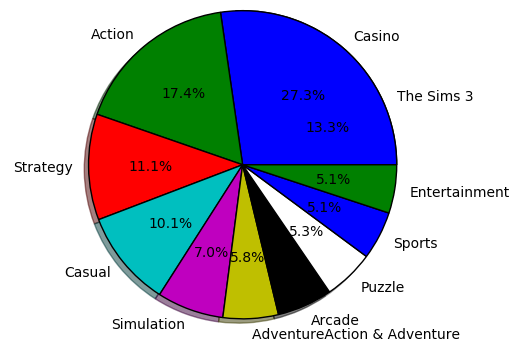

In [136]:

plt.pie(AppSpam[:10],labels=AppSpam[:10].index,autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [85]:
#####duplicate behavior#######
##01- duplicates from different user on the same app##
dup01=new_df.loc[:,['review','app']]
dup01_1=dup01.loc[dup01.duplicated(),:]

In [86]:
###02 - duplicates from the same user on different apps#####
dup02=new_df.loc[:,['review','name']]
dup02_1=dup02.loc[dup02.duplicated(),:]

In [87]:
###03 - duplicates from same user on same app####
dup03=new_df.loc[:,['review','name']]
dup03_1=dup03.loc[dup03.duplicated(),:]

In [88]:
###04 - duplicates from different users on different apps###
dup04=new_df.loc[:,'review']
dup04_1=dup03.loc[dup04.duplicated(),:]

In [89]:
SpamInd=set(list(conflict.index)+list(dup01_1.index)+list(dup02_1.index)+list(dup03_1.index)+list(dup04_1.index))

In [90]:
####possiblity of spam opinion######
len(SpamInd)*1.0/new_df.shape[0]

0.1977483000780292

In [91]:
###Add a new column called Spam, 0 means not spam, 1 means spam
new_df['spam']=0
for i in range(new_df.shape[0]):
    if i in SpamInd:
        new_df.loc[i,'spam']=1
    else:
        new_df.loc[i,'spam']=0

In [92]:
new_df

,category,name,app,review,sentiment,ratingNum,spam
0,Action,Kalito Doughnuts,Color Switch,This is the type of game you can just pickup a...,4.4690,5,0
1,Communication,Jonathan Macabuhay,Messenger,Very nice to meet you at work and I have to go...,3.9508,5,0
2,Finance,Lisa Resendez,IRS2Go,To the ones saying this app keeps giving a mes...,4.3394,5,0
3,Communication,3rd Degree Inc,Marco Polo Video Walkie Talkie,But it constantly crashes! I have reinstalled...,4.7370,5,0
4,SportsAction & Adventure,Morgan Wilson,Madden NFL Mobile,I don't like being overwhelmed by all these he...,2.1050,2,0
5,Action,Arrun Gaydhani,Color Switch,Perfect example of what a mobile game should b...,4.7176,5,0
6,Action,Fatima Damir,Color Switch,It's good but the ads are annoying. I like how...,1.8282,4,1
7,Action,Versha Verma,Color Switch,Its a commentable game. It is not too gud as t...,4.6720,5,0
8,Action,Trisha Gupta,Color Switch,It is a excellent game. But why is Google givi...,2.3636,4,0
9,Action,anonymous,Color Switch,This game is so much fun to play in. You get t...,4.8828,5,0


In [93]:
Spam_df=new_df.loc[SpamInd,:]

In [99]:
Count=Spam_df.groupby('category').count()['name']

In [105]:
T10=Count.sort_values(ascending=False)[:10]

In [120]:
T10

category
Casino                         210
Action                         185
Strategy                       117
Casual                         102
Puzzle                          76
Arcade                          72
Simulation                      65
Sports                          61
Social                          57
AdventureAction & Adventure     53
Name: name, dtype: int64

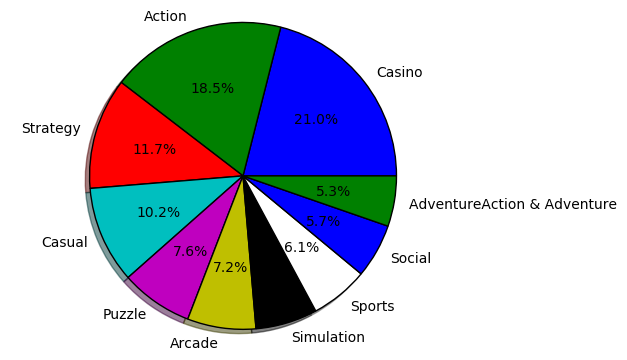

In [116]:

plt.pie(T10,labels=T10.index,autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

In [110]:
T10.index

Index([u'Casino', u'Action', u'Strategy', u'Casual', u'Puzzle', u'Arcade',
       u'Simulation', u'Sports', u'Social', u'AdventureAction & Adventure'],
      dtype='object', name=u'category')